In [25]:
#import pandas and numpy
import numpy as np
import pandas as pd

#Importing and uploading dataset
dataset = pd.read_csv(r'/kaggle/input/amazon-productcsv/amazon products.csv')

In [26]:
dataset.head()

,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [27]:
dataset.shape

(10002, 28)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                10002 non-null  object 
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8232 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

In [29]:
# check for duplicates
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
9997     False
9998     False
9999     False
10000    False
10001    False
Length: 10002, dtype: bool

In [30]:
#Dropping redundant columns
cols=[0,2,3,5,6,8,9,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
dataset.drop(dataset.columns[cols],axis=1,inplace=True)

In [31]:
# dropping null values to avoid errors 
dataset.dropna(inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7216 entries, 0 to 10001
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Product Name           7216 non-null   object
 1   Category               7216 non-null   object
 2   Selling Price          7216 non-null   object
 3   About Product          7216 non-null   object
 4   Product Specification  7216 non-null   object
 5   Shipping Weight        7216 non-null   object
dtypes: object(6)
memory usage: 394.6+ KB


In [32]:
# new data frame with split value columns. We use n = 3 to get a maximum of 3+1 columns
new = dataset["Category"].str.split("|", n = 3, expand = True)
  
# making the first category called Main Category
dataset["Main Category"]= new[0] 
  
# making the second category called sub_category 
dataset["Sub-Category"]= new[1]

# making the third category called side_category 
dataset["Side Category"]= new[2]

# making the last column consist of the remaining categories
dataset["Other Categories"]= new[3]

# Dropping old category columns and the remaining categories 
dataset.drop(columns =["Category", "Other Categories"], inplace = True)

In [33]:
#Revised dataset to conduct EDA - Exploratory Data Analysis
dataset.head()

,Product Name,Selling Price,About Product,Product Specification,Shipping Weight,Main Category,Sub-Category,Side Category
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",$237.68,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7 pounds,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters"
1,"Electronic Snap Circuits Mini Kits Classpack, ...",$99.95,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4 pounds,Toys & Games,Learning & Education,Science Kits & Toys
2,3Doodler Create Flexy 3D Printing Filament Ref...,$34.99,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8 ounces,Toys & Games,Arts & Crafts,Craft Kits
3,Guillow Airplane Design Studio with Travel Cas...,$28.91,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4 ounces,Toys & Games,Hobbies,Models & Model Kits
4,Woodstock- Collage 500 pc Puzzle,$17.49,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4 ounces,Toys & Games,Puzzles,Jigsaw Puzzles


In [34]:
dataset.rename(columns = {'Uniq Id':'Id','Shipping Weight':'Shipping Weight(Pounds)', 'Selling Price':'Selling Price($)'}, inplace = True)

dataset['Shipping Weight(Pounds)'] = dataset['Shipping Weight(Pounds)'].str.strip('ounces')
dataset['Shipping Weight(Pounds)'] = dataset['Shipping Weight(Pounds)'].str.strip('pounds').astype(float)
dataset['Selling Price($)'] = dataset['Selling Price($)'].str.replace('$', '').astype(float)

dataset.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,Product Name,Selling Price($),About Product,Product Specification,Shipping Weight(Pounds),Main Category,Sub-Category,Side Category
0,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",237.68,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters"
1,"Electronic Snap Circuits Mini Kits Classpack, ...",99.95,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4.0,Toys & Games,Learning & Education,Science Kits & Toys
2,3Doodler Create Flexy 3D Printing Filament Ref...,34.99,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8,Toys & Games,Arts & Crafts,Craft Kits
3,Guillow Airplane Design Studio with Travel Cas...,28.91,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4,Toys & Games,Hobbies,Models & Model Kits
4,Woodstock- Collage 500 pc Puzzle,17.49,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4,Toys & Games,Puzzles,Jigsaw Puzzles


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7216 entries, 0 to 10001
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Name             7216 non-null   object 
 1   Selling Price($)         7216 non-null   float64
 2   About Product            7216 non-null   object 
 3   Product Specification    7216 non-null   object 
 4   Shipping Weight(Pounds)  7216 non-null   float64
 5   Main Category            7216 non-null   object 
 6   Sub-Category             7216 non-null   object 
 7   Side Category            6231 non-null   object 
dtypes: float64(2), object(6)
memory usage: 507.4+ KB


In [36]:
# Start of EDA
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# finding out the unique main categories
dataset["Main Category"].unique()

array(['Sports & Outdoors ', 'Toys & Games ',
       'Clothing, Shoes & Jewelry ', 'Home & Kitchen ', 'Pet Supplies ',
       'Arts, Crafts & Sewing ', 'Electronics ', 'Patio, Lawn & Garden ',
       'Tools & Home Improvement ', 'Office Products ', 'Baby Products ',
       'Grocery & Gourmet Food ', 'Video Games ',
       'Remote & App Controlled Vehicle Parts ', 'Health & Household ',
       'Industrial & Scientific ', 'Beauty & Personal Care ',
       'Automotive ', 'Remote & App Controlled Vehicles & Parts ',
       'Musical Instruments ', 'Hobbies ', 'Movies & TV ',
       'Cell Phones & Accessories '], dtype=object)

Text(0, 0.5, 'Count of products')

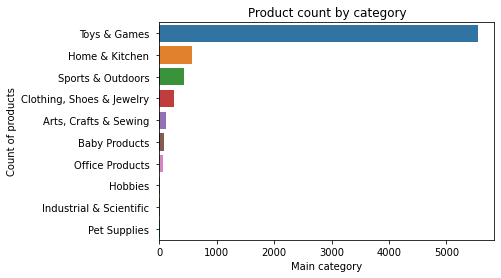

In [38]:
#data visualisation

#patterns in terms of Product Category popularity
#generate count for "Main Category"

#Top 10 barplot of categories
order = dataset['Main Category'].value_counts()[:10].index
sns.countplot(y='Main Category', data=dataset, order=order)
plt.title("Product count by category")
plt.xlabel("Main category")
plt.ylabel("Count of products")

Text(0.5, 1.0, 'Distribution of the Prices in Toys & Games Category')

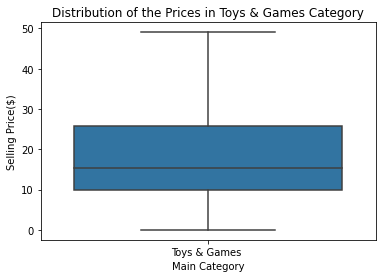

In [39]:
#generate boxplot to understand the distribution  
toys = dataset[dataset["Main Category"] == 'Toys & Games ']
sns.boxplot(data = toys, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Toys & Games Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Toys & Games category')

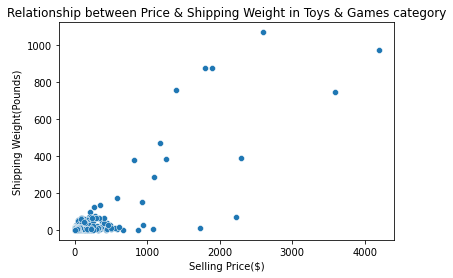

In [40]:
#generate scatterplot to understand the relationship 
sns.scatterplot(data=toys, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Toys & Games category")

Text(0.5, 1.0, 'Distribution of the Prices in Home & Kitchen Category')

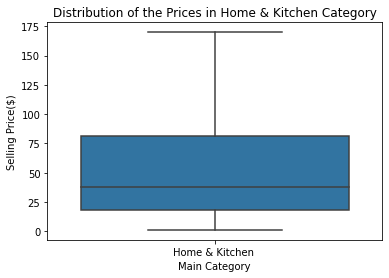

In [41]:
#generate boxplot to understand the distribution  
home = dataset[dataset["Main Category"] == 'Home & Kitchen ']
sns.boxplot(data = home, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Home & Kitchen Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Home & Kitchen Category')

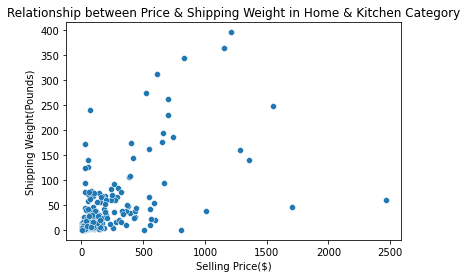

In [42]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=home, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Home & Kitchen Category")

Text(0.5, 1.0, 'Distribution of the Prices in Sports & Outdoors Category')

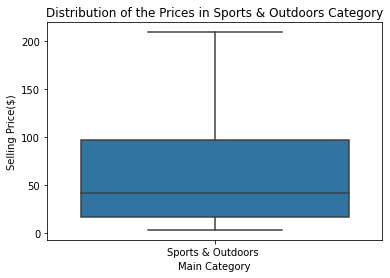

In [43]:
#generate boxplot to understand the distribution  
sports = dataset[dataset["Main Category"] == 'Sports & Outdoors ']
sns.boxplot(data = sports, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Sports & Outdoors Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Sports & Outdoors Category')

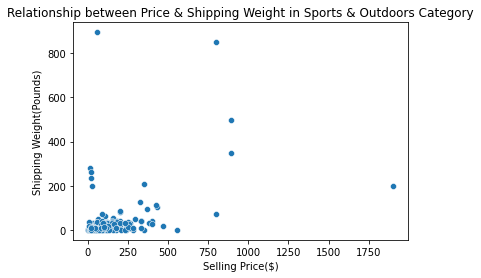

In [44]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=sports, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Sports & Outdoors Category")

Text(0.5, 1.0, 'Distribution of the Prices in Clothing, Shoes & Jewelry Category')

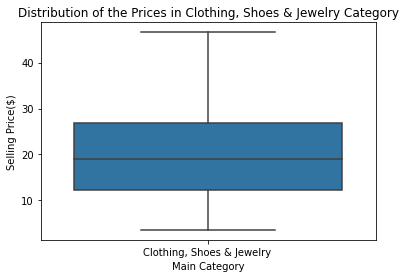

In [45]:
#generate boxplot to understand the distribution  
csj = dataset[dataset["Main Category"] == 'Clothing, Shoes & Jewelry ']
sns.boxplot(data = csj, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Clothing, Shoes & Jewelry Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Clothing, Shoes & Jewelry Category')

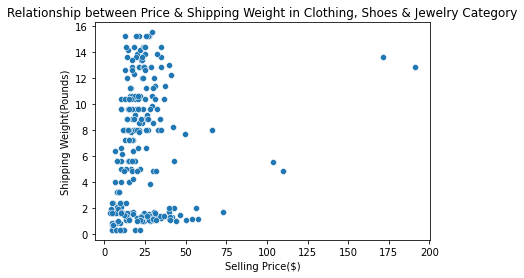

In [46]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=csj, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Clothing, Shoes & Jewelry Category")

Text(0.5, 1.0, 'Distribution of the Prices in Arts, Crafts & Sewing Category')

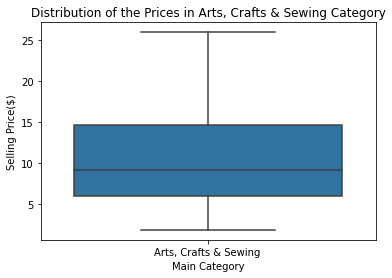

In [47]:
#generate boxplot to understand the distribution  
artscraft = dataset[dataset["Main Category"] == 'Arts, Crafts & Sewing ']
sns.boxplot(data = artscraft, x='Main Category', y='Selling Price($)', showfliers=False)
plt.title("Distribution of the Prices in Arts, Crafts & Sewing Category")

Text(0.5, 1.0, 'Relationship between Price & Shipping Weight in Arts, Crafts & Sewing Category')

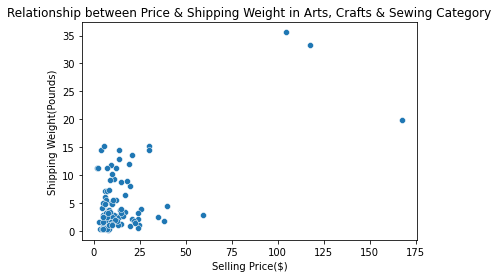

In [48]:
#generate scatterplot to understand the relationship
sns.scatterplot(data=artscraft, x="Selling Price($)", y="Shipping Weight(Pounds)")
plt.title("Relationship between Price & Shipping Weight in Arts, Crafts & Sewing Category")

In [51]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.float_format', '{:20,.2f}'.format)
pd.set_option('display.max_colwidth', None)